<div align='center'>
    <h1><b>Univariable Linear Regression Model</b></h1>
</div>

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pylab as py
import random
import statsmodels.api as sm
import seaborn as sns
import sys
sys.path.insert(0, '.')

from utilities import *

In [21]:
# plt.style.available

In [22]:
# CREATE DATASET
size = random.choice(range(20, 101, 20))

x = [i for i in range(size)]
y = [i + np.random.normal(-1.5, 1.5) for i in range(size)]

# **0. visualization**

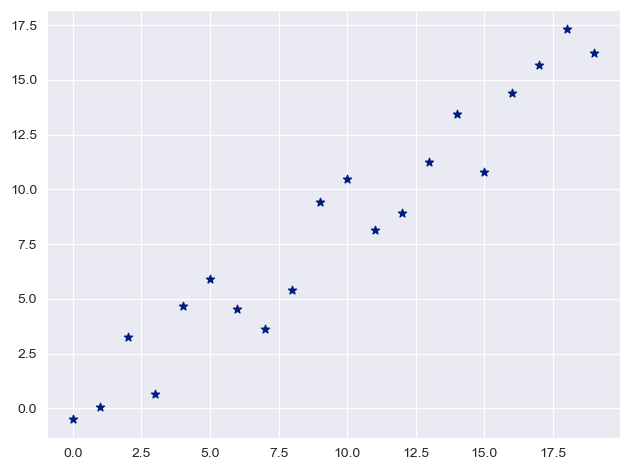

In [23]:
# SCATTER PLOT
with plt.style.context('seaborn-dark-palette'):
    fig = plt.figure(tight_layout=True)
    plt.scatter(x, y, marker='*')
    plt.show()

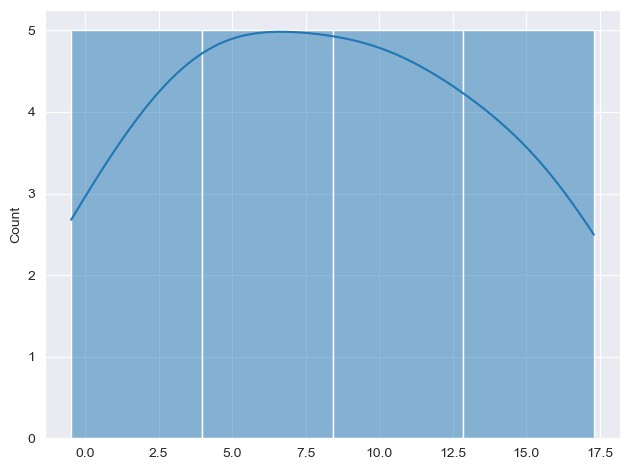

In [24]:
# HISTOGRAM
sns.set_style('darkgrid')
fig = plt.figure(tight_layout=True)
sns.histplot(data=y, kde=True, bins=int(size/5))
plt.show()

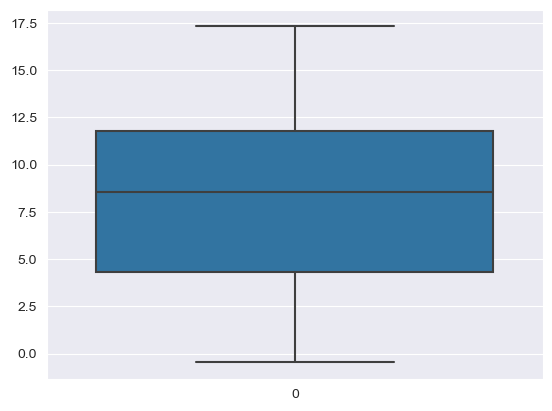

In [25]:
# BOXPLOT
sns.boxplot(data=y)
plt.show()

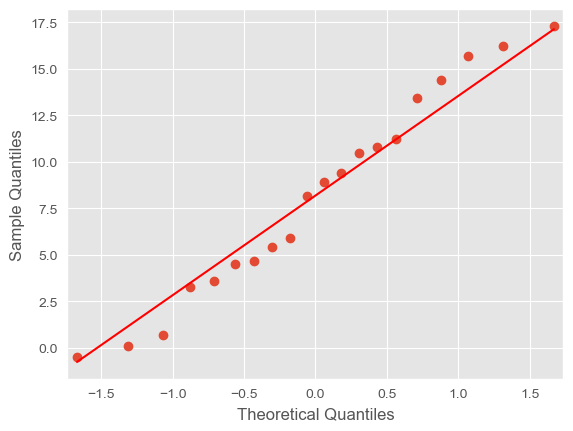

In [26]:
# QQ-PLOT
# TODO: https://www.geeksforgeeks.org/qqplot-quantile-quantile-plot-in-python/
with plt.style.context('ggplot'):
    sm.qqplot(np.array(y, dtype=object), line='s')
    py.show()

# **1. implementation**

## **hypothesis**

For 1 feature:
$$y_i = h(x_i) = x_i * w + b$$
Where:
- $h$ : hypothesis
- $x_i$ : input-feature, independent variable
- $y_i$ : dependent-variable
- $w$ : slope
- $b$ : bias, y-intercept

In [27]:
def h(x, w, b):
    """Hypothesis function
    
    Args:
        x (float): i-th feature array sample
        w (float): slope of linear function
        b (float): bias

    Returns:
        float: model prediction
    """
    return x * w + b

## **loss function**

### **MSE**

Also called Quadratic Loss or L2 loss. Is measured as the average of squared difference between predictions and actual observations. 

$$L(x_i) = \text{Error} = \frac{1}{2m} \sum^{m}_{i=0} (y_i - h(x_i))^2$$

MSE has nice mathematical properties whic makes it easier to calculate gradients.

There are also other error functions like: MAE, Huber-Loss. See more [here](https://pytorch.org/docs/stable/nn.functional.html).

In [28]:
def error(y, x, w, b):
    """Error function
    
    Args:
        y (np.array): target array sample
        x (np.array): feature array sample
        w (float): slope of linear function
        b (float): bias

    Returns:
        float: error, result of MSE
    """
    N = len(y)
    return sum(
        [
            (h(x[i], w, b) - y[i]) ** 2 for i in range(N)
        ]
    ) / (2*N)

## **gradient descent**

## **application**

In [29]:
def train(x, y, umbral, alfa):
    """Train model
    
    Args:
        x (np.array): input feature, feature array sample
        y (np.array): feature to predict, target array sample
        umbral (float): error threshold | avoid infinite loop and overfitting
        alfa (float): learning rate

    Returns:
        tuple: (w, b, error)
    """
    w = np.random.rand()
    b = np.random.rand()
    it_history = []

    error_value = error(y, x, w, b)
    while error_value > umbral:
        it_history.append((w, b, error_value))

        w = w - alfa * sum(
            [
                (h(x[i], w, b) - y[i]) * x[i] for i in range(len(y))
            ]
        ) / len(y)
        b = b - alfa * sum(
            [
                (h(x[i], w, b) - y[i]) for i in range(len(y))
            ]
        ) / len(y)

        error_value = error(y, x, w, b)
        print(f'error: {error_value}')
    return w, b, error_value, it_history

def test(x, y, w, b):
    fig = plt.figure()
    plt.plot(x,y,'*')
    plt.plot(x,[h(xi,w,b) for xi in x])
    plt.show()

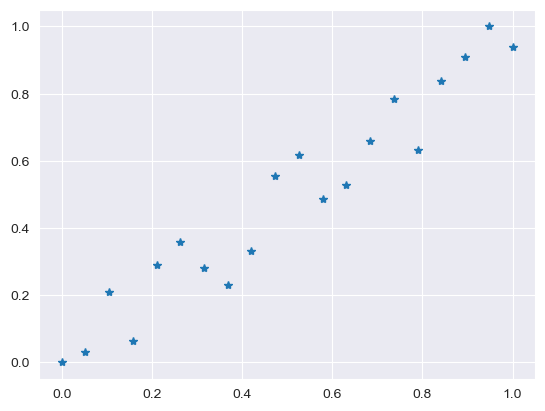

In [30]:
# NORMALIZE DATA
max_x = max(x)
min_x = min(x)
x = [(e - min_x)/(max_x - min_x) for e in x]

max_y = max(y)
min_y = min(y)
y = [(e - min_y)/(max_y - min_y) for e in y]

plt.plot(x,y,'*')
plt.show()

In [31]:
w, b, error_value, it_history = train(x, y, 0.01, 0.01)

error: 0.03923934032904682
error: 0.03853721614431792
error: 0.03785246375727349
error: 0.037184646306680356
error: 0.036533337928671694
error: 0.03589812347987573
error: 0.035278598267515185
error: 0.03467436778630196
error: 0.03408504746195597
error: 0.033510262401181455
error: 0.03294964714793792
error: 0.032402845445847525
error: 0.031869510006584334
error: 0.03134930228409455
error: 0.030841892254501478
error: 0.030346958201551543
error: 0.029864186507462125
error: 0.02939327144903524
error: 0.028933914998904353
error: 0.028485826631785165
error: 0.028048723135604314
error: 0.02762232842738338
error: 0.02720637337375817
error: 0.026800595616016783
error: 0.026404739399542722
error: 0.02601855540755187
error: 0.025641800599015652
error: 0.025274238050664543
error: 0.024915636802969522
error: 0.0245657717100011
error: 0.02422442329306852
error: 0.023891377598043655
error: 0.023566426056277158
error: 0.023249365349016178
error: 0.022939997275235588
error: 0.022638128622796797
error: 

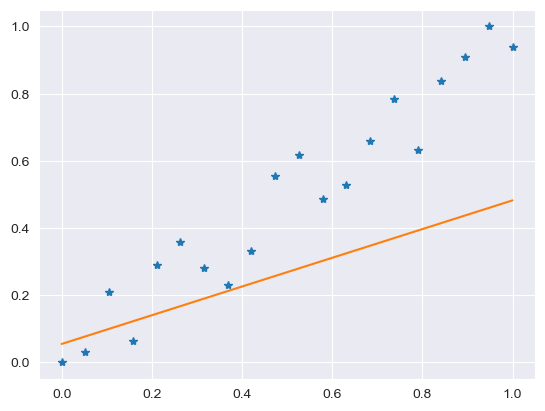

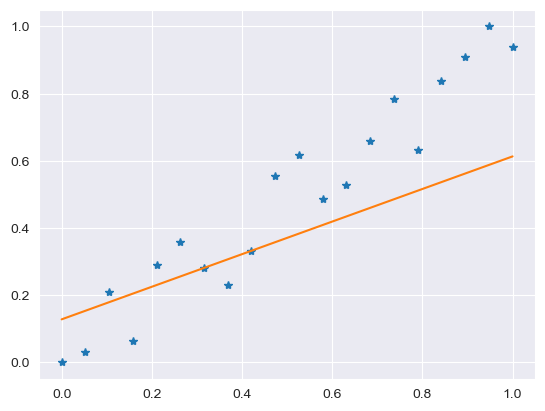

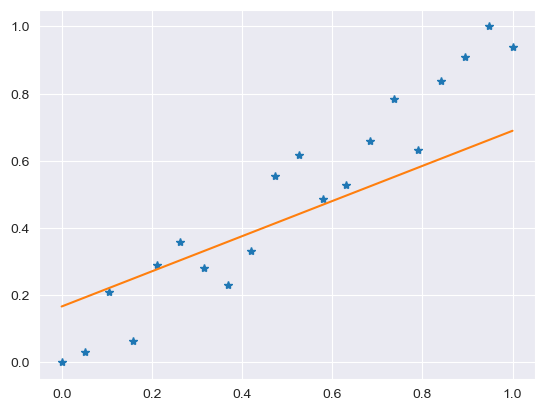

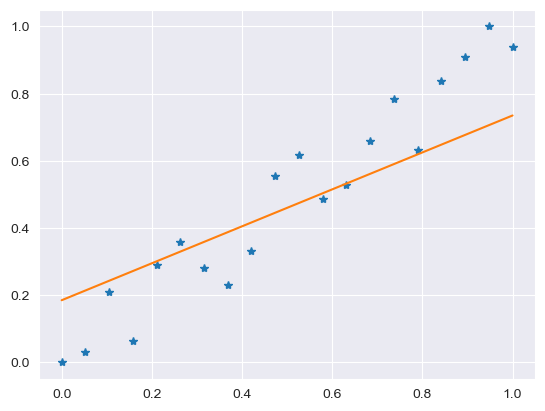

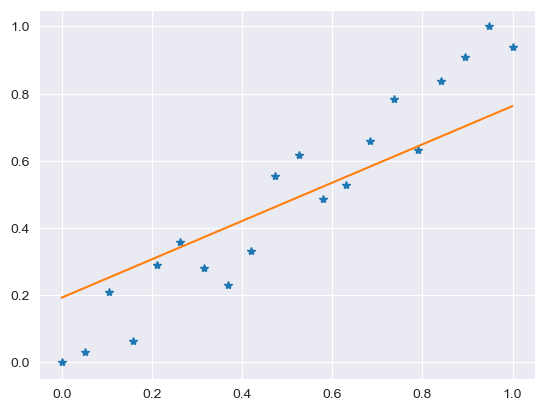

In [32]:
for _ in range(0, len(it_history), 45):
    ww, bb, ee = it_history[_]
    test(x, y, ww, bb)

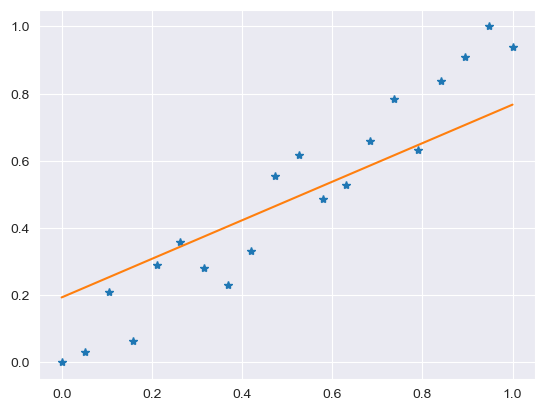

In [33]:
test(x, y, w, b)

# **2. analysis**

In [ ]:
# https://www.statsmodels.org/devel/regression.html
# https://www.statsmodels.org/devel/endog_exog.html
model = sm.OLS(endog=y, exog=x)
res = model.fit()

In [ ]:
lookup(type(model))

In [ ]:
get_info(res)

In [ ]:
res.summary()

In [ ]:
res.summary2()

# **3. references**

- https://medium.com/analytics-vidhya/understanding-the-linear-regression-808c1f6941c0
- https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931